In [2]:
import numpy as np
from tensorflow import keras

In [1]:
import numpy as np
import tensorflow as tf
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

SE aplican los modelos de redes para los puntos pedidos. En ambos se hace el caso sugerido en el notebook del laboratorio y luego un ensayo para subfiteo y sobrefiteo. Simplemente cambiando números.

In [4]:
def build_model2(activation = 'sigmoid', loss='binary_crossentropy'):
  model = keras.models.Sequential()
  model.add(keras.layers.Dense(4, input_dim=2, activation='relu'))
  model.add(keras.layers.Dense(8, activation='relu'))
  model.add(keras.layers.Dense(1, activation = activation))
  opt = keras.optimizers.SGD(learning_rate=0.01)
  model.compile(loss=loss, optimizer=opt, metrics=['accuracy'])
  return model

In [5]:
from sklearn.datasets import make_moons

# dataset
X, y = make_moons(n_samples=1000, noise=0.2, random_state=42)
X = np.array(X)
y = np.array(y)

n_train = 500
train_X, test_X = X[:n_train, :], X[n_train:, :]
train_y, test_y = y[:n_train], y[n_train:]
model = build_model2()
history = model.fit(train_X, train_y, validation_data=(test_X, test_y), epochs=1000, verbose=1)

Epoch 1/1000


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.4938 - loss: 0.7025 - val_accuracy: 0.5120 - val_loss: 0.6815
Epoch 2/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4530 - loss: 0.6894 - val_accuracy: 0.4920 - val_loss: 0.6689
Epoch 3/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4086 - loss: 0.6798 - val_accuracy: 0.5220 - val_loss: 0.6565
Epoch 4/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4421 - loss: 0.6712 - val_accuracy: 0.6080 - val_loss: 0.6444
Epoch 5/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5326 - loss: 0.6579 - val_accuracy: 0.6460 - val_loss: 0.6328
Epoch 6/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5625 - loss: 0.6461 - val_accuracy: 0.6900 - val_loss: 0.6214
Epoch 7/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6276 - loss: 0.6372 - val_accuracy: 0.7200 - val_loss: 0.6104
Epoch 8/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6842 - loss: 0.6210 - val_accuracy: 0.7580 - val_l

In [6]:
_, train_acc = model.evaluate(train_X, train_y, verbose=0)
_, test_acc = model.evaluate(test_X, test_y, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.966, Test: 0.972


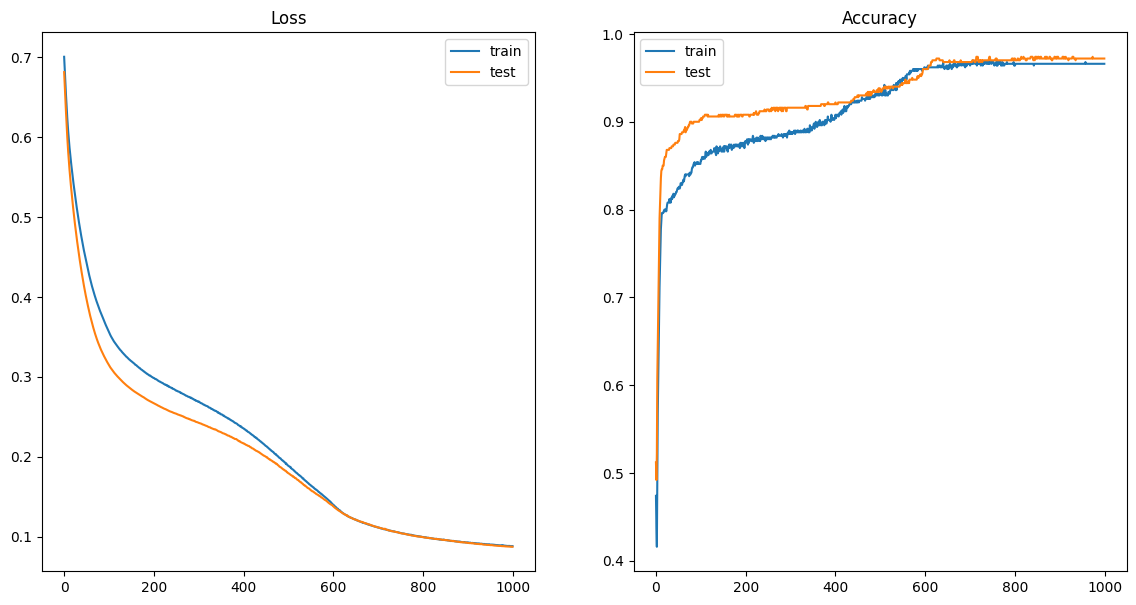

In [7]:
plt.figure(figsize=(14,7))
# Gráfica de pérdidas durante el entrenamiento
plt.subplot(121)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
# Gráfica de las precisión durante el entrenamiento
plt.subplot(122)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

subfiteo

In [8]:
def build_model3(activation = 'sigmoid', loss='binary_crossentropy'):
  model = keras.models.Sequential()
  model.add(keras.layers.Dense(2, input_dim=2, activation='relu'))
  model.add(keras.layers.Dense(4, activation='relu'))
  model.add(keras.layers.Dense(1, activation = activation))
  opt = keras.optimizers.SGD(learning_rate=0.01)
  model.compile(loss=loss, optimizer=opt, metrics=['accuracy'])
  return model

In [9]:
X, y = make_moons(n_samples=1000, noise=0.2, random_state=42)
X = np.array(X)
y = np.array(y)

n_train = 500
train_X, test_X = X[:n_train, :], X[n_train:, :]
train_y, test_y = y[:n_train], y[n_train:]
model = build_model3()
history = model.fit(train_X, train_y, validation_data=(test_X, test_y), epochs=1000, verbose=1)

Epoch 1/1000


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.7464 - loss: 0.6373 - val_accuracy: 0.7880 - val_loss: 0.6159
Epoch 2/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7548 - loss: 0.6336 - val_accuracy: 0.7960 - val_loss: 0.6105
Epoch 3/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7872 - loss: 0.6170 - val_accuracy: 0.7980 - val_loss: 0.6050
Epoch 4/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7318 - loss: 0.6247 - val_accuracy: 0.8060 - val_loss: 0.5989
Epoch 5/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7535 - loss: 0.6137 - val_accuracy: 0.8080 - val_loss: 0.5927
Epoch 6/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7525 - loss: 0.6163 - val_accuracy: 0.8080 - val_loss: 0.5860
Epoch 7/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7571 - loss: 0.6117 - val_accuracy: 0.8140 - val_loss: 0.5792
Epoch 8/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7582 - loss: 0.6067 - val_accuracy: 0.8160 - val_l

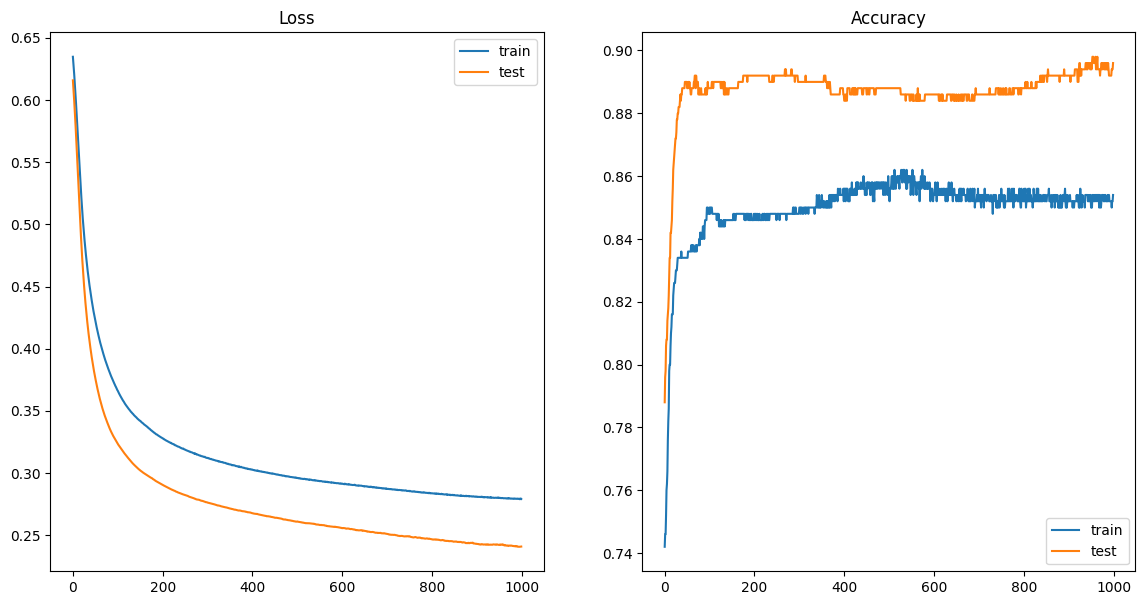

In [10]:
plt.figure(figsize=(14,7))
# Gráfica de pérdidas durante el entrenamiento
plt.subplot(121)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
# Gráfica de las precisión durante el entrenamiento
plt.subplot(122)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

sobrefiteo

In [11]:
def build_model4(activation = 'sigmoid', loss='binary_crossentropy'):
  model = keras.models.Sequential()
  model.add(keras.layers.Dense(8, input_dim=2, activation='relu'))
  model.add(keras.layers.Dense(16, activation='relu'))
  model.add(keras.layers.Dense(1, activation = activation))
  opt = keras.optimizers.SGD(learning_rate=0.01)
  model.compile(loss=loss, optimizer=opt, metrics=['accuracy'])
  return model

In [12]:
X, y = make_moons(n_samples=1000, noise=0.2, random_state=42)
X = np.array(X)
y = np.array(y)

n_train = 500
train_X, test_X = X[:n_train, :], X[n_train:, :]
train_y, test_y = y[:n_train], y[n_train:]
model = build_model4()
history = model.fit(train_X, train_y, validation_data=(test_X, test_y), epochs=1000, verbose=1)

Epoch 1/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.4791 - loss: 0.6795 - val_accuracy: 0.6000 - val_loss: 0.6595
Epoch 2/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5739 - loss: 0.6720 - val_accuracy: 0.7320 - val_loss: 0.6465
Epoch 3/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6985 - loss: 0.6516 - val_accuracy: 0.7640 - val_loss: 0.6347
Epoch 4/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6959 - loss: 0.6434 - val_accuracy: 0.7560 - val_loss: 0.6237
Epoch 5/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7013 - loss: 0.6320 - val_accuracy: 0.7640 - val_loss: 0.6135
Epoch 6/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6938 - loss: 0.6210 - val_accuracy: 0.7740 - val_loss: 0.6035
Epoch 7/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7260 - loss: 0.6086 - val_accuracy: 0.7900 - val_loss: 0.5934
Epoch 8/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7264 - loss: 0.6076 - val_accuracy: 0

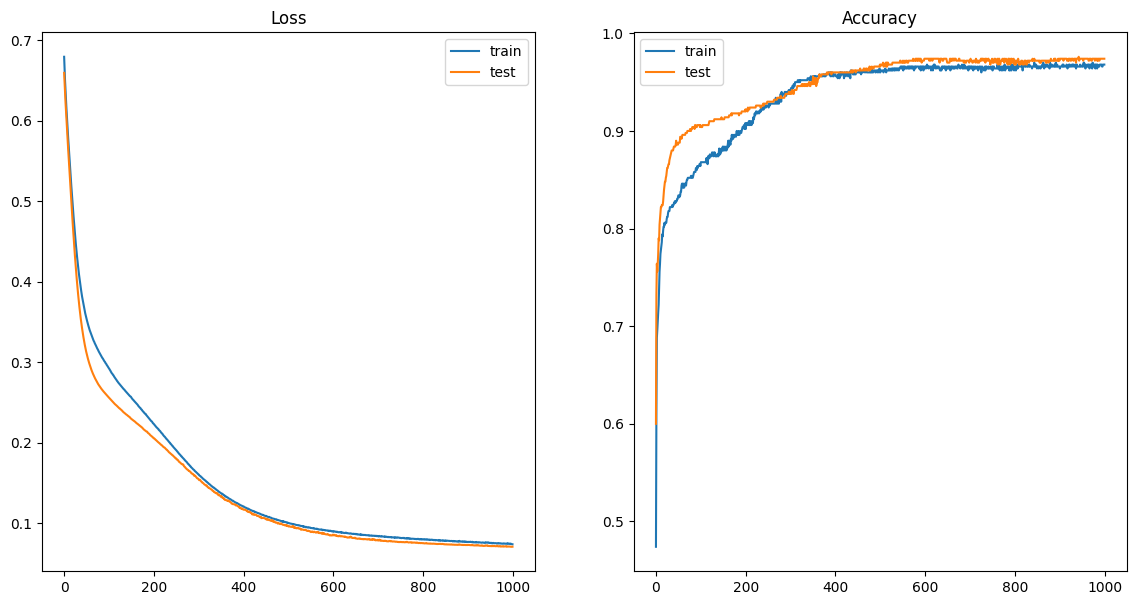

In [13]:
plt.figure(figsize=(14,7))
# Gráfica de pérdidas durante el entrenamiento
plt.subplot(121)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
# Gráfica de las precisión durante el entrenamiento
plt.subplot(122)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

2. Para el dataset load digits, construir un modelo de red neuronal empleando keras para realizar la clasificación.

In [14]:
digits = load_digits(n_class=6)
X, y = digits.data, digits.target
n_samples, n_features = X.shape

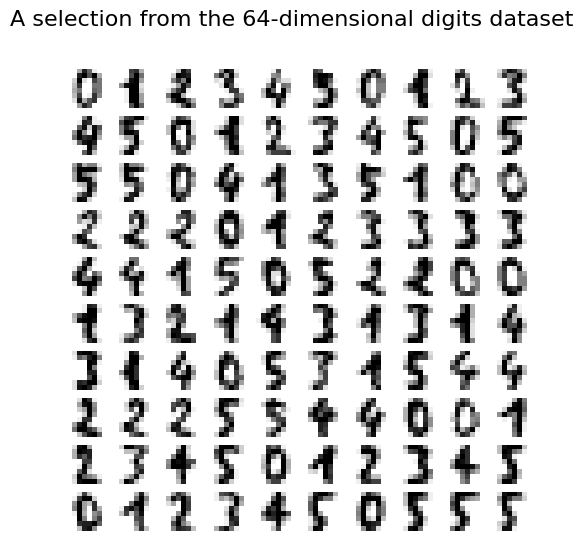

In [15]:
fig, axs = plt.subplots(nrows=10, ncols=10, figsize=(6, 6))
for idx, ax in enumerate(axs.ravel()):
    ax.imshow(X[idx].reshape((8, 8)), cmap=plt.cm.binary)
    ax.axis("off")
_ = fig.suptitle("A selection from the 64-dimensional digits dataset", fontsize=16)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Epoch 1/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.1718 - loss: 5.8681 - val_accuracy: 0.4080 - val_loss: 2.2582
Epoch 2/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4439 - loss: 1.9030 - val_accuracy: 0.6609 - val_loss: 1.0324
Epoch 3/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6889 - loss: 0.9615 - val_accuracy: 0.7816 - val_loss: 0.7227
Epoch 4/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8137 - loss: 0.5706 - val_accuracy: 0.8678 - val_loss: 0.5167
Epoch 5/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8833 - loss: 0.3706 - val_accuracy: 0.8621 - val_loss: 0.4771
Epoch 6/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9287 - loss: 0.2609 - val_accuracy: 0.8851 - val_loss: 0.3960
Epoch 7/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9411 - loss: 0.1824 - val_accuracy: 0.9023 - val_loss: 0.3518
Epoch 8/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9458 - loss: 0.1784 - val_accuracy: 0.8966 - val_loss

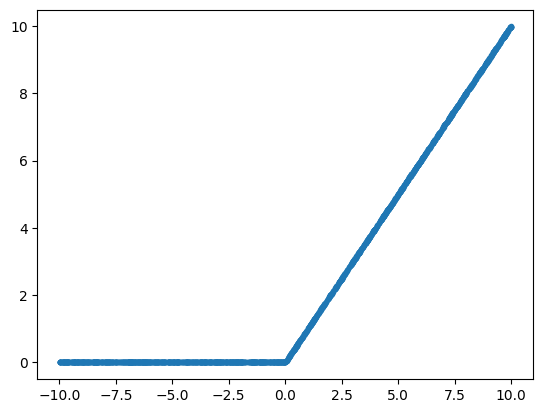

In [16]:
y_train_cat = keras.utils.to_categorical(y_train)
y_test_cat = keras.utils.to_categorical(y_test)

model = keras.Sequential([
    keras.layers.Dense(32, activation="relu", input_shape=(64,)),
    keras.layers.Dense(6, activation="softmax")
])

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
model.fit(X_train, y_train_cat, epochs=10, batch_size=32, validation_split=0.2)
model.evaluate(X_test, y_test_cat)

x = np.random.uniform(low=-10.0, high=10, size=(2000,))
y_relu = keras.activations.relu(x, negative_slope=0, max_value=None, threshold=0)
plt.plot(x, y_relu, '.')
plt.show()


subfiteo

Epoch 1/3
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 142ms/step - accuracy: 0.1428 - loss: 5.2577 - val_accuracy: 0.1782 - val_loss: 5.0328
Epoch 2/3
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.1576 - loss: 4.4407 - val_accuracy: 0.1897 - val_loss: 4.3535
Epoch 3/3
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.1636 - loss: 3.8785 - val_accuracy: 0.1839 - val_loss: 3.8011
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1794 - loss: 3.6808 


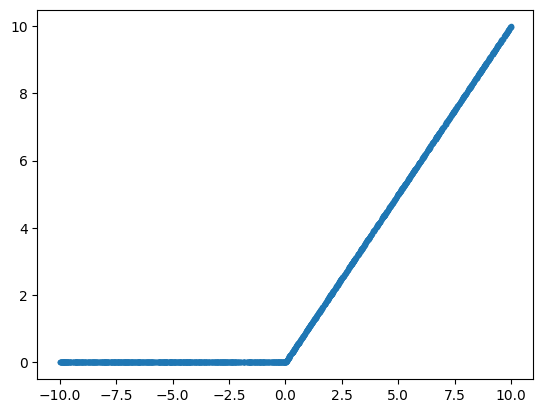

In [23]:

digits = load_digits(n_class=6)
X, y = digits.data, digits.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

y_train_cat = keras.utils.to_categorical(y_train, num_classes=6)
y_test_cat = keras.utils.to_categorical(y_test, num_classes=6)

model = keras.Sequential([
    keras.layers.Dense(8, activation="relu", input_shape=(64,)),
    keras.layers.Dense(6, activation="softmax")
])

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
history = model.fit(X_train, y_train_cat, epochs=3, batch_size=256, validation_split=0.2)

model.evaluate(X_test, y_test_cat)

# Graficar ReLU para ver la curva
x = np.random.uniform(low=-10.0, high=10, size=(2000,))
y_relu = keras.activations.relu(x)
plt.plot(x, y_relu, '.')
plt.show()

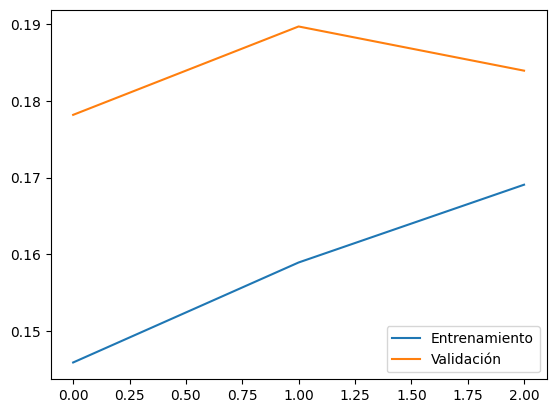

In [24]:
plt.plot(history.history["accuracy"], label="Entrenamiento")
plt.plot(history.history["val_accuracy"], label="Validación")
plt.legend()
plt.show()

sobrefiteo

Epoch 1/100
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7390 - loss: 0.8069 - val_accuracy: 0.9598 - val_loss: 0.1362
Epoch 2/100
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9843 - loss: 0.0457 - val_accuracy: 0.9425 - val_loss: 0.1204
Epoch 3/100
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9747 - loss: 0.1066 - val_accuracy: 0.9540 - val_loss: 0.1147
Epoch 4/100
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0110 - val_accuracy: 0.9770 - val_loss: 0.0703
Epoch 5/100
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0014 - val_accuracy: 0.9828 - val_loss: 0.0428
Epoch 6/100
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 6.6969e-04 - val_accuracy: 0.9828 - val_loss: 0.0401
Epoch 7/100
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 4.9519e-04 - val_accuracy: 0.9828 - val_loss: 0.0403
Epoch 8/100
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 1.0000 - loss: 4.0773e-04 - val_accuracy

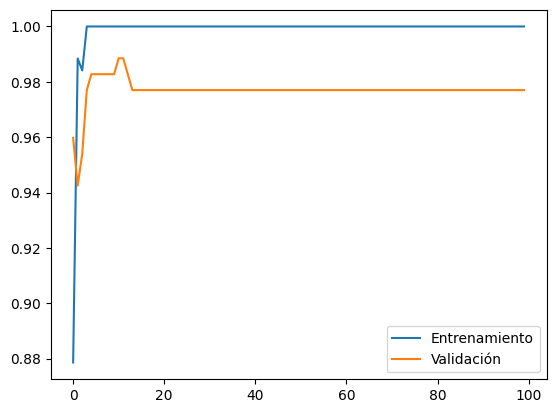

In [25]:
digits = load_digits(n_class=6)
X, y = digits.data, digits.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

y_train_cat = keras.utils.to_categorical(y_train, num_classes=6)
y_test_cat = keras.utils.to_categorical(y_test, num_classes=6)

model = keras.Sequential([
    keras.layers.Dense(256, activation="relu", input_shape=(64,)),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dense(6, activation="softmax")
])

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
history = model.fit(X_train, y_train_cat, epochs=100, batch_size=8, validation_split=0.2)

model.evaluate(X_test, y_test_cat)

plt.plot(history.history["accuracy"], label="Entrenamiento")
plt.plot(history.history["val_accuracy"], label="Validación")
plt.legend()
plt.show()
